### Pymaceuticals Skill Drill - Day 1

Congratulations, you are hired by Pymaceuticals Inc., one of the leading imaginary pharmaceutical companies that specializes in anti-cancer pharmaceuticals, to assist their senior scientist team in the effort to begin screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

In this study, 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. You have been tasked by the senior scientist team to generate an initial drug regimens comparison and generate a summary of your findings. 

For this skill drill, you will walk through the steps of a basic analysis and visualize our dataset using a new type of visualization - a box and whisker plot. Although we have provided all of the steps required to produce each output, there may be some new concepts and/or terminology in this skill drill you may not have seen before. If you are ever stuck or confused, try googling some of the terms or check out the resource links we provide throughout the activity. You got this!

### Data Cleaning 

In [1]:
%matplotlib inline

In [2]:
# Import dependencies
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [3]:
# Read the mouse data and the study results
mouse_df = pd.read_csv('../Resources/Mouse_metadata.csv')
study_df = pd.read_csv('../Resources/Study_results.csv')

In [4]:
# Display the mouse data
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
# Display the study data
study_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into a single dataset and display it
mouse_study_df = pd.merge(mouse_df, study_df, how = "outer" , on = 'Mouse ID')
#Extracting information from the data 
mouse_study_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [7]:
#checking the number of mouse in the dataframe
number_of_mice = mouse_study_df.count()
number_of_mice

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [8]:
#checking the number of mouse in the dataframe
mice_num = mouse_study_df["Mouse ID"].value_counts()
print("Number of Mice is:", len(mice_num))

Number of Mice is: 249


In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mouse_id = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_id


array(['g989'], dtype=object)

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
#mouse_data = mouse_study_df["Mouse ID"] == 'g989'
#display(mouse_data)

In [11]:
# Optional: Get all the data for the duplicate mouse ID.
mice_dup = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "g989"]
mice_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID and display it
clean_df = mouse_study_df.drop_duplicates(subset = 'Mouse ID', keep ='last' )
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [13]:
clean_study = mouse_study_df[mouse_study_df['Mouse ID'].isin(mouse_study_df)==False]
clean_study.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


### Generating the Boxplot

In [14]:
# Determine the final timepoint for each mouse.
# Start by getting the greatest timepoint for each mouse
max_timepoint = mouse_study_df.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint = max_timepoint.reset_index()
max_timepoint.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [15]:
# Join the newly created `.max()` dataframe to the dataframe from Part 1
final_merge = pd.merge(max_timepoint, clean_study, on=['Mouse ID', 'Timepoint'], how='left')
final_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [16]:
# Create a list with all 10 drug regimens.
drug_regimens= clean_df['Drug Regimen'].unique()
print(drug_regimens)

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


In [17]:

# Create a empty list to fill with the tumor vol data
tumor_vol_data = []

# Isolate (filter) each mice on each drug to collect their tumor volume.
for drug_reg in drug_regimens:
    
    # Locate the rows which match the drug and get the final tumor volumes of all mice

    final_tumor_volume = final_merge.loc[final_merge['Drug Regimen'] == drug_reg]['Tumor Volume (mm3)']
    
    # Append the outcome to the empty list previously created.
    tumor_vol_data.append(final_tumor_volume)

<IPython.core.display.Javascript object>


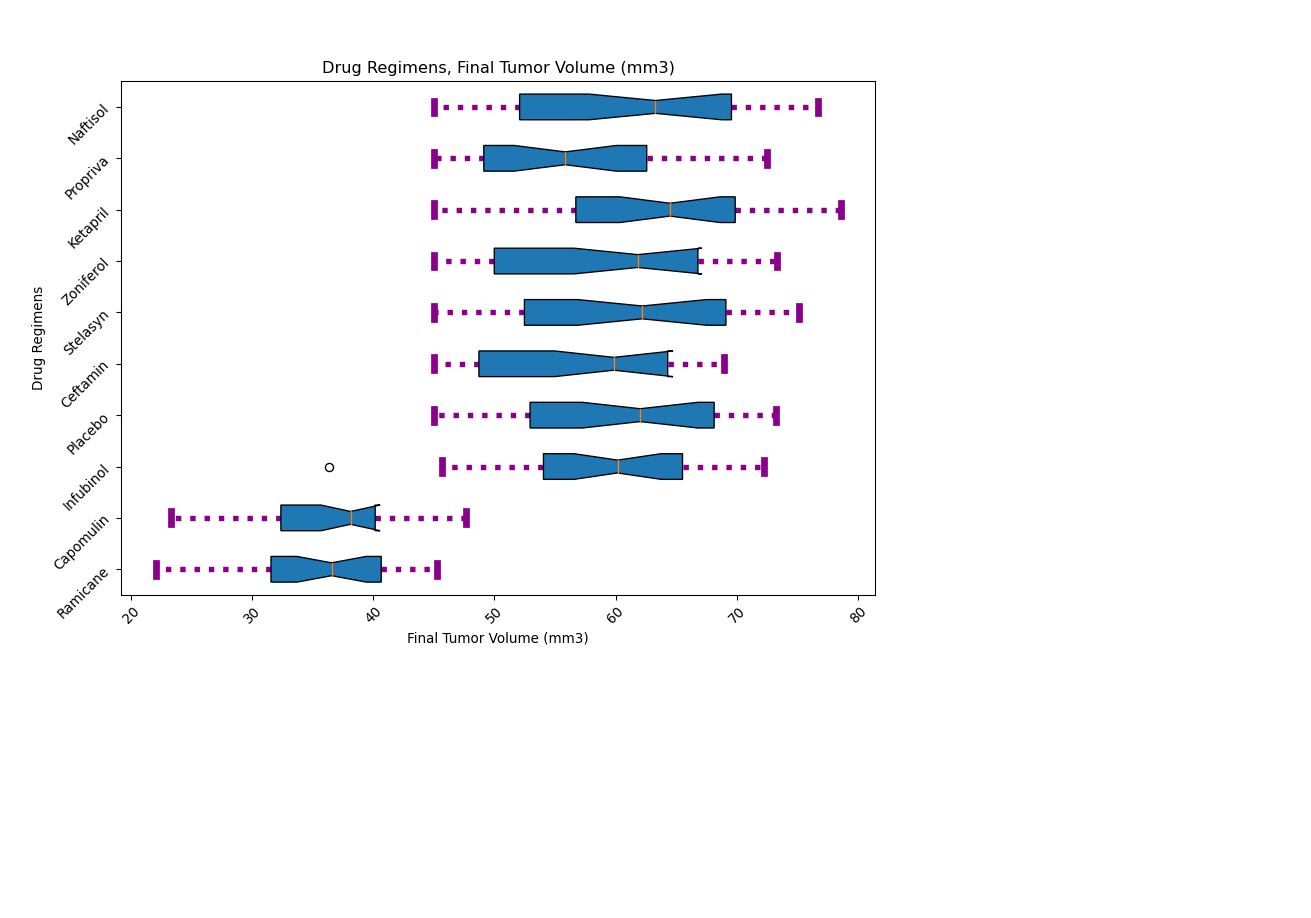

In [18]:
# Create a boxplot that visualizes the final tumor volume of all mice in the study across all drug regimens.
plt.figure(figsize =(10, 7))
# Define a custom shape for all outliers in the visualization
custom_shape = dict(color='k', marker='*')


# Create horizontal box and whisker plot (Boxplot is also known as a box-and-whisker plot)
fig = plt.boxplot(tumor_vol_data, labels = drug_regimens, vert=False, patch_artist = True, notch ='True')
plt.xlabel('Final Tumor Volume (mm3)')
plt.ylabel("Drug Regimens")
plt.title('Drug Regimens, Final Tumor Volume (mm3)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [19]:
# changing color and linewidth of whiskers
for whisker in fig['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 4,
                linestyle =":")
 

In [20]:
# changing color and linewidth of caps
for cap in fig['caps']:
    cap.set(color ='#8B008B',
            linewidth = 5)
 